In [1]:
import os
import zipfile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Download data and unzip
current_dir = os.getcwd()
data_dir = "./data"
zip = os.path.join(data_dir, "playground-series-s4e9.zip")

if not os.path.exists(data_dir):
    os.mkdir("./data")
    os.system(
        f"kaggle competitions download -c playground-series-s4e9 -p {data_dir}"
    )
    with zipfile.ZipFile(zip) as zip_ref:
        zip_ref.extractall(data_dir)
    os.remove(zip)

In [3]:
train_data = pd.read_csv(os.path.join("data", "train.csv"))
test_data = pd.read_csv(os.path.join("data", "test.csv"))
sample_submission = pd.read_csv(os.path.join("data", "sample_submission.csv"))

# Exploratory Data Analysis

- brand -> target encoding with mean price across brand
- fuel_type one hot encode
- engine information col

- ext_col ignore for now
- int_col ignore for now

- accident col one hot encode
- clean_title col one hot encode
- remove any NaNs at the end

In [4]:
display(train_data)

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200
1,1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999
2,2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900
3,3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000
4,4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188528,188528,Cadillac,Escalade ESV Platinum,2017,49000,Gasoline,420.0HP 6.2L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,White,Beige,None reported,Yes,27500
188529,188529,Mercedes-Benz,AMG C 43 AMG C 43 4MATIC,2018,28600,Gasoline,385.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,8-Speed A/T,White,Black,At least 1 accident or damage reported,Yes,30000
188530,188530,Mercedes-Benz,AMG GLC 63 Base 4MATIC,2021,13650,Gasoline,469.0HP 4.0L 8 Cylinder Engine Gasoline Fuel,7-Speed A/T,White,Black,None reported,Yes,86900
188531,188531,Audi,S5 3.0T Prestige,2022,13895,Gasoline,3.0L,1-Speed Automatic,Daytona Gray Pearl Effect,Black,None reported,NaN,84900


In [16]:
for col in train_data.columns:
    counts = train_data[col].value_counts()
    print(f"Number of different values for {col}: {len(counts)}")
    display(counts)

Number of different values for id: 188533


id
0         1
125693    1
125684    1
125685    1
125686    1
         ..
62846     1
62847     1
62848     1
62849     1
188532    1
Name: count, Length: 188533, dtype: int64

Number of different values for brand: 57


brand
Ford             23088
Mercedes-Benz    19172
BMW              17028
Chevrolet        16335
Audi             10887
Porsche          10612
Land              9525
Toyota            8850
Lexus             8643
Jeep              6474
Cadillac          4674
RAM               4249
Nissan            3930
Tesla             3738
INFINITI          3276
GMC               3215
Dodge             3133
Mazda             2719
Kia               2497
Lincoln           2423
Subaru            2381
Acura             2282
Honda             2101
Hyundai           2045
Volkswagen        1765
Jaguar            1319
Bentley           1155
MINI              1064
Genesis            969
Buick              940
Maserati           939
Lamborghini        809
Chrysler           727
Volvo              723
Alfa               682
Rivian             590
Rolls-Royce        561
Mitsubishi         551
Pontiac            538
Hummer             520
Ferrari            359
McLaren            243
Aston              238
Satur

Number of different values for model: 1897


model
F-150 XLT                        2945
M3 Base                          2229
Camaro 2SS                       1709
M4 Base                          1622
Mustang GT Premium               1526
                                 ... 
IONIQ Plug-In Hybrid SEL            2
X5 3.0i                             1
X5 xDrive40e                        1
XLR Base                            1
Integra w/A-Spec Tech Package       1
Name: count, Length: 1897, dtype: int64

Number of different values for model_year: 34


model_year
2021    18198
2018    16414
2020    15848
2022    15749
2019    15409
2016    13696
2017    12794
2015    11389
2023     8769
2014     8415
2013     6796
2011     6265
2012     6095
2008     5156
2007     4876
2010     4235
2005     3129
2006     2814
2009     2716
2004     2570
2003     1906
2001     1534
2002     1282
2000      558
1999      554
1998      343
1997      312
1996      189
2024      162
1993      140
1995      102
1994       92
1992       14
1974       12
Name: count, dtype: int64

Number of different values for milage: 6651


milage
60000     1319
170000    1246
120000    1178
110000    1155
130000     970
          ... 
5111         1
29755        1
28761        1
170612       1
134603       1
Name: count, Length: 6651, dtype: int64

Number of different values for fuel_type: 7


fuel_type
Gasoline          165940
Hybrid              6832
E85 Flex Fuel       5406
Diesel              3955
–                    781
Plug-In Hybrid       521
not supported         15
Name: count, dtype: int64

Number of different values for engine: 1117


engine
355.0HP 5.3L 8 Cylinder Engine Gasoline Fuel           3462
240.0HP 2.0L 4 Cylinder Engine Gasoline Fuel           2902
420.0HP 6.2L 8 Cylinder Engine Gasoline Fuel           2841
2.0L I4 16V GDI DOHC Turbo                             2680
375.0HP 3.5L V6 Cylinder Engine Gasoline Fuel          2451
                                                       ... 
151.0HP 1.5L 4 Cylinder Engine Gas/Electric Hybrid        1
184.0HP 2.4L 4 Cylinder Engine Flex Fuel Capability       1
78.0HP 1.2L 3 Cylinder Engine Gasoline Fuel               1
139.0HP 1.6L 4 Cylinder Engine Plug-In Electric/Gas       1
313.0HP 2.0L 4 Cylinder Engine Plug-In Electric/Gas       1
Name: count, Length: 1117, dtype: int64

Number of different values for transmission: 52


transmission
A/T                                                   49904
8-Speed A/T                                           20645
Transmission w/Dual Shift Mode                        19255
6-Speed A/T                                           18044
6-Speed M/T                                           11998
7-Speed A/T                                           11124
Automatic                                             10691
8-Speed Automatic                                      8431
10-Speed A/T                                           8044
9-Speed A/T                                            3866
5-Speed A/T                                            3217
10-Speed Automatic                                     3164
6-Speed Automatic                                      2799
4-Speed A/T                                            2546
5-Speed M/T                                            2409
9-Speed Automatic                                      2325
CVT Transmission           

Number of different values for ext_col: 319


ext_col
Black                                 48658
White                                 43815
Gray                                  25293
Silver                                16995
Blue                                  14555
                                      ...  
GT SILVER                                 5
Blue Caelum                               5
Granite Crystal Metallic Clearcoat        5
BLUE                                      3
Mango Tango Pearlcoat                     2
Name: count, Length: 319, dtype: int64

Number of different values for int_col: 156


int_col
Black           107674
Beige            24495
Gray             21204
Brown             5810
Red               5145
                 ...  
Nougat Brown         7
Classic Red          7
Cobalt Blue          6
WHITE                6
ORANGE               4
Name: count, Length: 156, dtype: int64

Number of different values for accident: 2


accident
None reported                             144514
At least 1 accident or damage reported     41567
Name: count, dtype: int64

Number of different values for clean_title: 1


clean_title
Yes    167114
Name: count, dtype: int64

Number of different values for price: 1569


price
15000     1920
12000     1459
30000     1280
29000     1228
8500      1204
          ... 
239991      22
269991      22
259991      21
107998      20
45998       19
Name: count, Length: 1569, dtype: int64

In [13]:
for i in pd.get_dummies(train_data).columns:
    print(i)

id
model_year
milage
price
brand_Acura
brand_Alfa
brand_Aston
brand_Audi
brand_BMW
brand_Bentley
brand_Bugatti
brand_Buick
brand_Cadillac
brand_Chevrolet
brand_Chrysler
brand_Dodge
brand_FIAT
brand_Ferrari
brand_Ford
brand_GMC
brand_Genesis
brand_Honda
brand_Hummer
brand_Hyundai
brand_INFINITI
brand_Jaguar
brand_Jeep
brand_Karma
brand_Kia
brand_Lamborghini
brand_Land
brand_Lexus
brand_Lincoln
brand_Lotus
brand_Lucid
brand_MINI
brand_Maserati
brand_Maybach
brand_Mazda
brand_McLaren
brand_Mercedes-Benz
brand_Mercury
brand_Mitsubishi
brand_Nissan
brand_Plymouth
brand_Polestar
brand_Pontiac
brand_Porsche
brand_RAM
brand_Rivian
brand_Rolls-Royce
brand_Saab
brand_Saturn
brand_Scion
brand_Subaru
brand_Suzuki
brand_Tesla
brand_Toyota
brand_Volkswagen
brand_Volvo
brand_smart
model_124 Spider Abarth
model_128 i
model_135 i
model_135 is
model_1500 Big Horn
model_1500 Cheyenne
model_1500 Cheyenne Extended Cab
model_1500 Classic SLT
model_1500 Classic Tradesman
model_1500 Classic Warlock
model_1500

In [14]:
mean_prices = []
for brand in train_data.brand.unique():
    mean_prices.append(train_data[train_data['brand'] == brand].mean(numeric_only=True)['price'])

(array([ 8., 18., 11.,  6.,  4.,  2.,  1.,  0.,  0.,  0.,  2.,  2.,  1.,
         0.,  1.,  1.]),
 array([ 14652.41666667,  24336.640625  ,  34020.86458333,  43705.08854167,
         53389.3125    ,  63073.53645833,  72757.76041667,  82441.984375  ,
         92126.20833333, 101810.43229167, 111494.65625   , 121178.88020833,
        130863.10416667, 140547.328125  , 150231.55208333, 159915.77604167,
        169600.        ]),
 <BarContainer object of 16 artists>)

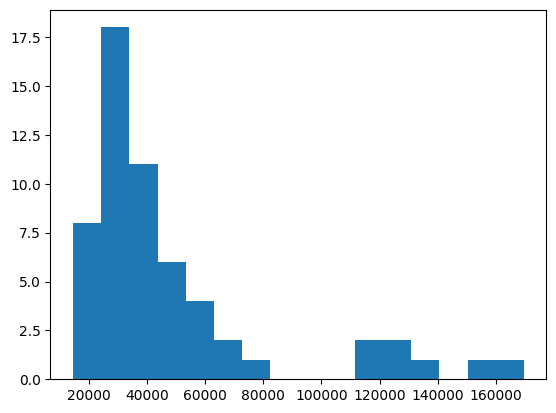

In [15]:
plt.hist(mean_prices,bins=16)

In [16]:
data_subset = train_data[train_data['brand'] == "Mazda"]
data_subset.mean(numeric_only=True)['price']

25332.82861346083

In [17]:
data_subset = train_data[train_data['brand'] == "Audi"]
data_subset
# for i in data_subset.model.unique():
#     print(i)
data_subset.model.value_counts()

model
Q5 2.0T Premium Plus         626
S4 3.0T Premium Plus         606
Q5 S line Premium Plus       552
A5 2.0T Premium Plus         506
A4 2.0T Premium              503
                            ... 
GL-Class GL 550 4MATIC         1
Romeo Giulia Quadrifoglio      1
AMG GT 53 Base                 1
Xterra S                       1
S60 T6 Momentum                1
Name: count, Length: 183, dtype: int64

In [18]:
train_data.isnull().sum()

id                  0
brand               0
model               0
model_year          0
milage              0
fuel_type        5083
engine              0
transmission        0
ext_col             0
int_col             0
accident         2452
clean_title     21419
price               0
dtype: int64

In [19]:
train_data.fuel_type.value_counts()

fuel_type
Gasoline          165940
Hybrid              6832
E85 Flex Fuel       5406
Diesel              3955
–                    781
Plug-In Hybrid       521
not supported         15
Name: count, dtype: int64

In [53]:
from sklearn.feature_selection import mutual_info_regression


def make_mi_scores(X, y):
    X = X.copy()
    for colname in X.select_dtypes(["object", "category"]):
        X[colname], _ = X[colname].factorize()
    # All discrete features should now have integer dtypes
    discrete_features = [pd.api.types.is_integer_dtype(t) for t in X.dtypes]
    mi_scores = mutual_info_regression(
        X, y, discrete_features=discrete_features, random_state=0
    )
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores


X = train_data.copy()
X = X.dropna()
X = X.drop(
    columns=[
        "id",
#         "brand",
        # "model",
#         "model_year",
#         "milage",
        # "fuel_type",
        # "engine",
#         "transmission",
#         "ext_col",
#         "int_col",
        # "accident",
        "clean_title",
    ]
)
y = X.pop("price")
mi_scores = make_mi_scores(X, y)
display(mi_scores)

milage          0.706227
engine          0.528194
model_year      0.517903
model           0.435038
transmission    0.289106
brand           0.124051
int_col         0.091069
ext_col         0.081962
accident        0.054617
fuel_type       0.016369
Name: MI Scores, dtype: float64

In [44]:
filter_string = "HP"
filtered_train_data = train_data[~train_data['engine'].str.contains(filter_string, case=False, na=False)]
display(filtered_train_data)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(filtered_train_data["engine"].value_counts())

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
8,8,Ford,F-150 XLT,2020,38352,Gasoline,2.7L V6 24V PDI DOHC Twin Turbo,10-Speed Automatic,Snowflake White Pearl Metallic,Black,None reported,Yes,62890
11,11,Tesla,Model S P100D,2015,81500,NaN,Electric Motor Electric Fuel System,1-Speed A/T,Gray,White,None reported,Yes,19000
20,20,Land,Rover Defender S,2023,7978,Gasoline,5.2L V10 40V PDI DOHC,8-Speed Automatic,Santorini Black Metallic,Black,None reported,NaN,41998
39,39,Buick,Enclave Premium,2022,9642,Gasoline,3.6L V6 24V GDI DOHC,9-Speed Automatic,Ebony Twilight Metallic,Dark Galvanized,None reported,Yes,63900
43,43,Mercedes-Benz,AMG GT 53 Base,2022,10972,Gasoline,4.0L V8 32V GDI DOHC Twin Turbo,8-Speed Automatic,Magnetite Black Metallic,Black,None reported,Yes,244896
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188511,188511,Land,Rover Range Rover Velar P380 SE R-Dynamic,2022,15198,Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Firenze Red,Ebony,None reported,NaN,23739
188513,188513,Lexus,GS 350 F Sport,2022,82046,Gasoline,3.5L V6 24V PDI DOHC,8-Speed Automatic,Caviar,Black,None reported,NaN,48990
188515,188515,GMC,Sierra 1500 Denali Ultimate,2023,9978,Gasoline,6.2L V8 16V GDI OHV,10-Speed A/T,White Frost Tri-Coat,Walnut,At least 1 accident or damage reported,Yes,48999
188520,188520,Mercedes-Benz,GLC 300 GLC 300,2022,18031,Gasoline,2.0 Liter Turbo,Automatic,White,Black,None reported,NaN,39998


engine
2.0L I4 16V GDI DOHC Turbo                          2680
3.5L V6 24V PDI DOHC Twin Turbo                     1842
5.7L V8 16V MPFI OHV                                1540
4.0L V8 32V GDI DOHC Twin Turbo                     1516
3.6L V6 24V MPFI DOHC                               1480
3.6L V6 24V GDI DOHC                                1224
2.0 Liter Turbo                                     1164
5.3L V8 16V GDI OHV                                 1011
–                                                    925
2.5L I4 16V GDI DOHC                                 898
3.0 Liter Turbo                                      823
3.5L V6 24V PDI DOHC                                 814
3.0 Liter                                            748
6.2L V8 16V GDI OHV                                  728
2.0 Liter                                            636
3.0L V6 24V GDI DOHC Twin Turbo                      635
2.0 Liter TFSI                                       610
3.5 Liter               

In [32]:
counts = train_data["engine"].value_counts()
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(counts)

engine
355.0HP 5.3L 8 Cylinder Engine Gasoline Fuel                             3462
240.0HP 2.0L 4 Cylinder Engine Gasoline Fuel                             2902
420.0HP 6.2L 8 Cylinder Engine Gasoline Fuel                             2841
2.0L I4 16V GDI DOHC Turbo                                               2680
375.0HP 3.5L V6 Cylinder Engine Gasoline Fuel                            2451
340.0HP 3.0L V6 Cylinder Engine Gasoline Fuel                            2436
490.0HP 6.2L 8 Cylinder Engine Gasoline Fuel                             2187
455.0HP 6.2L 8 Cylinder Engine Gasoline Fuel                             2138
425.0HP 3.0L Straight 6 Cylinder Engine Gasoline Fuel                    2134
300.0HP 3.0L Straight 6 Cylinder Engine Gasoline Fuel                    2084
295.0HP 3.5L V6 Cylinder Engine Gasoline Fuel                            1917
285.0HP 3.6L V6 Cylinder Engine Gasoline Fuel                            1910
302.0HP 3.5L V6 Cylinder Engine Gasoline Fuel            

In [47]:
counts = test_data["engine"].value_counts()
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(counts)

engine
355.0HP 5.3L 8 Cylinder Engine Gasoline Fuel                             2189
240.0HP 2.0L 4 Cylinder Engine Gasoline Fuel                             1966
420.0HP 6.2L 8 Cylinder Engine Gasoline Fuel                             1853
2.0L I4 16V GDI DOHC Turbo                                               1833
375.0HP 3.5L V6 Cylinder Engine Gasoline Fuel                            1639
340.0HP 3.0L V6 Cylinder Engine Gasoline Fuel                            1565
490.0HP 6.2L 8 Cylinder Engine Gasoline Fuel                             1502
455.0HP 6.2L 8 Cylinder Engine Gasoline Fuel                             1401
300.0HP 3.0L Straight 6 Cylinder Engine Gasoline Fuel                    1369
425.0HP 3.0L Straight 6 Cylinder Engine Gasoline Fuel                    1317
285.0HP 3.6L V6 Cylinder Engine Gasoline Fuel                            1306
302.0HP 3.5L V6 Cylinder Engine Gasoline Fuel                            1272
3.5L V6 24V PDI DOHC Twin Turbo                          

In [46]:
train_data_copy = train_data.copy()
train_data_copy["average_brand_price"] = (
    train_data_copy.groupby("brand")["price"].transform("mean")
)
train_data_copy

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,average_brand_price
0,0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200,17162.015977
1,1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999,30712.595130
2,2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900,41836.755127
3,3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000,53556.327141
4,4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500,51244.399541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188528,188528,Cadillac,Escalade ESV Platinum,2017,49000,Gasoline,420.0HP 6.2L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,White,Beige,None reported,Yes,27500,45659.094780
188529,188529,Mercedes-Benz,AMG C 43 AMG C 43 4MATIC,2018,28600,Gasoline,385.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,8-Speed A/T,White,Black,At least 1 accident or damage reported,Yes,30000,51244.399541
188530,188530,Mercedes-Benz,AMG GLC 63 Base 4MATIC,2021,13650,Gasoline,469.0HP 4.0L 8 Cylinder Engine Gasoline Fuel,7-Speed A/T,White,Black,None reported,Yes,86900,51244.399541
188531,188531,Audi,S5 3.0T Prestige,2022,13895,Gasoline,3.0L,1-Speed Automatic,Daytona Gray Pearl Effect,Black,None reported,NaN,84900,41004.856985
